In [20]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import to_tree, ClusterNode, dendrogram
from scipy.cluster import hierarchy
from typing import List

In [21]:
!pip install fastcluster
from fastcluster import linkage

## **About the dataset**
Immunotherapy dataset comes from the UCI Machine Learning Repository and the dataset contains information about wart treatment results of 90 patients using immunotherapy. 

In the sex field, 1 and 2 represent male and female respectively.

Type field refers to the three types of treatment. 

In the Result_of_Treatment field, 1 means treatment succeeded and 0 means treatment did not succeed. 

(Added ID column later only for the purpose of hierarchical clustering)


In [2]:
#importing Immunotherapy dataset
df = pd.read_csv(r"C:\Users\namra\Documents\NAMRATA\Internships\AarogyaAI\clustering\Immunotherapy.csv")
df

,ID,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,S43,1,22,2.25,14,3,51,50,1
1,S44,1,15,3.00,2,3,900,70,1
2,S45,1,16,10.50,2,1,100,25,1
3,S46,1,27,4.50,9,3,80,30,1
4,S47,1,20,8.00,6,1,45,8,1
...,...,...,...,...,...,...,...,...,...
85,S128,1,40,5.50,8,3,69,5,1
86,S129,1,38,7.50,8,2,56,45,1
87,S130,1,46,11.50,4,1,91,25,0
88,S131,1,32,12.00,9,1,43,50,0


#### **Exploratory Analysis**
checking for null values, data types, descriptive statistics and class imbalance

In [3]:
#checking for null values
df.isnull().sum()

ID                     0
sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   90 non-null     object 
 1   sex                  90 non-null     int64  
 2   age                  90 non-null     int64  
 3   Time                 90 non-null     float64
 4   Number_of_Warts      90 non-null     int64  
 5   Type                 90 non-null     int64  
 6   Area                 90 non-null     int64  
 7   induration_diameter  90 non-null     int64  
 8   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 6.5+ KB


In [5]:
df.describe()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.544444,31.044444,7.230556,6.144444,1.711111,95.700000,14.333333,0.788889
std,0.500811,12.235435,3.098166,4.212238,0.824409,136.614643,17.217707,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,1.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,9.937500,8.750000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


In [6]:
df['Result_of_Treatment'].value_counts()

#class imbalance

1    71
0    19
Name: Result_of_Treatment, dtype: int64

In [14]:
df1 = df.set_index('ID')
df1.drop(['Result_of_Treatment'], axis=1)

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter
ID,,,,,,,
S43,1,22,2.25,14,3,51,50
S44,1,15,3.00,2,3,900,70
S45,1,16,10.50,2,1,100,25
S46,1,27,4.50,9,3,80,30
S47,1,20,8.00,6,1,45,8
...,...,...,...,...,...,...,...
S128,1,40,5.50,8,3,69,5
S129,1,38,7.50,8,2,56,45
S130,1,46,11.50,4,1,91,25


### **Dendogram**

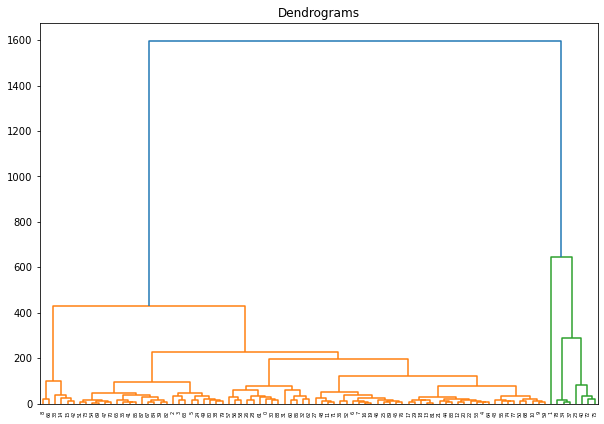

In [15]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df1, method='ward'), labels = df.index)
#plt.savefig("dendogram.pdf", format="pdf", bbox_inches="tight")

In [16]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
arr = cluster.fit_predict(df1)
arr

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [17]:
cluster = pd.DataFrame(arr)
cluster.rename(columns = {0:'labels'}, inplace = True)
cluster['ID'] = df1.index
cluster

,labels,ID
0,1,S43
1,0,S44
2,1,S45
3,1,S46
4,1,S47
...,...,...
85,1,S128
86,1,S129
87,1,S130
88,1,S131


In [18]:
print(cluster.loc[cluster['ID'] == 'S47'])

   labels   ID
4       1  S47


### **Highlighting Clusters**

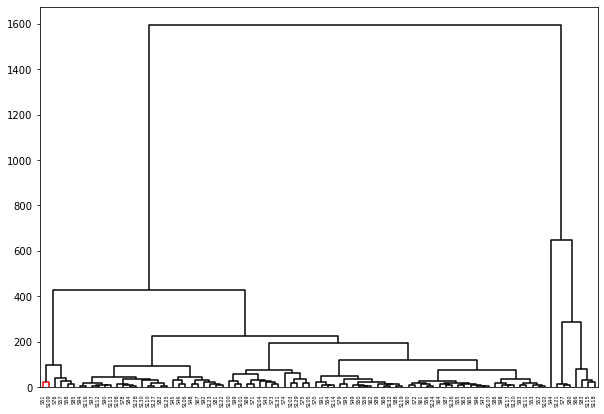

In [19]:
c = shc.linkage(df1, method='ward')
plt.figure(figsize=(10, 7)) 
link_colors = ['black'] * (2 * len(df1) - 1)
# Specify link you want to have highlighted
link_highlight = (8, 66)
# Find index in clustering where first two columns are equal to link_highlight. This will cause an exception if you look for a link, which is not in clustering
index_highlight = np.where((c[:,0] == link_highlight[0]) * 
                           (c[:,1] == link_highlight[1]))[0][0]
# Index in color_list of desired link is index from clustering + length of points
link_colors[index_highlight + len(df1)] = 'red'

shc.dendrogram(c, link_color_func=lambda k: link_colors[k], labels = df1.index )
plt.savefig("dendogram_highlight.pdf", format="pdf", bbox_inches="tight")

In [22]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(linkage="complete")
agg_clustering.fit(df1)
linkage_matrix = agg_clustering.children_

In [23]:
linkage_matrix

array([[ 54,  69],
       [ 13,  81],
       [ 16,  19],
       [ 51,  73],
       [  4,  64],
       [ 67,  84],
       [  7,  92],
       [ 41,  85],
       [ 53,  94],
       [ 25,  89],
       [ 39,  82],
       [  9,  59],
       [ 45,  76],
       [ 34,  37],
       [ 44,  83],
       [ 35,  97],
       [ 47,  70],
       [ 11,  71],
       [ 12,  20],
       [ 17,  29],
       [ 90, 106],
       [ 74,  77],
       [ 48, 107],
       [ 50,  68],
       [  6,  96],
       [ 10, 101],
       [ 38,  79],
       [ 98, 108],
       [ 91, 109],
       [ 55, 111],
       [ 46, 102],
       [ 21, 104],
       [ 15,  42],
       [ 36,  52],
       [ 65, 105],
       [ 93, 110],
       [ 99, 120],
       [ 30,  88],
       [ 95, 100],
       [ 26,  28],
       [  3,  63],
       [ 22, 117],
       [ 56,  58],
       [  5,  24],
       [ 78, 103],
       [ 86, 127],
       [ 80, 116],
       [121, 131],
       [113, 115],
       [ 43, 119],
       [114, 126],
       [ 18, 118],
       [ 49,

In [24]:
Z = linkage(df1, method="complete")

In [25]:
T = to_tree(Z, rd=False)

In [26]:
def _scipy_tree_to_newick_list(node: ClusterNode, newick: List[str], parentdist: float, leaf_names: List[str]) -> List[str]:
    """Construct Newick tree from SciPy hierarchical clustering ClusterNode

    This is a recursive function to help build a Newick output string from a scipy.cluster.hierarchy.to_tree input with
    user specified leaf node names.

    Notes:
        This function is meant to be used with `to_newick`

    Args:
        node (scipy.cluster.hierarchy.ClusterNode): Root node is output of scipy.cluster.hierarchy.to_tree from hierarchical clustering linkage matrix
        parentdist (float): Distance of parent node of `node`
        newick (list of string): Newick string output accumulator list which needs to be reversed and concatenated (i.e. `''.join(newick)`) for final output
        leaf_names (list of string): Leaf node names

    Returns:
        (list of string): Returns `newick` list of Newick output strings
    """
    if node.is_leaf():
        return newick + [f'{leaf_names[node.id]}:{parentdist - node.dist}']

    if len(newick) > 0:
        newick.append(f'):{parentdist - node.dist}')
    else:
        newick.append(');')
    newick = _scipy_tree_to_newick_list(node.get_left(), newick, node.dist, leaf_names)
    newick.append(',')
    newick = _scipy_tree_to_newick_list(node.get_right(), newick, node.dist, leaf_names)
    newick.append('(')
    return newick

def to_newick(tree: ClusterNode, leaf_names: List[str]) -> str:
    """Newick tree output string from SciPy hierarchical clustering tree

    Convert a SciPy ClusterNode tree to a Newick format string.
    Use scipy.cluster.hierarchy.to_tree on a hierarchical clustering linkage matrix to create the root ClusterNode for the `tree` input of this function.

    Args:
        tree (scipy.cluster.hierarchy.ClusterNode): Output of scipy.cluster.hierarchy.to_tree from hierarchical clustering linkage matrix
        leaf_names (list of string): Leaf node names

    Returns:
        (string): Newick output string
    """
    newick_list = _scipy_tree_to_newick_list(tree, [], tree.dist, leaf_names)
    return ''.join(newick_list[::-1])

In [28]:
newick_file = to_newick(T, df1.index)

In [29]:
with open('newick_output.txt', 'w') as f:
    print(newick_file, file=f)